# Introdução

Segmentação de clientes utilizando duas técnicas....
A primeira com seleção dos atributos renda e idade para agrupamento dos clientes.....
A segunda com o uso de PCA para extração das características principais usando todos os atributos...
Os algoritmos usados são o KMeans e Aglomerativo.....
O resultado final é o agrupamento dos clientes com a quantidade de grupos apontada por técnicas como Silhouette_score e Gráfico de Elbow e visualização gráfica em duas dimensões
com os dados em sua escala original e padronizados para comparação 

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
dados = pd.read_csv("segmentation data.csv")
dados

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [17]:
dados = dados.drop("ID", axis = 1)

In [19]:
dados.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [18]:
dados.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

## Visualização

<Axes: xlabel='Income', ylabel='Count'>

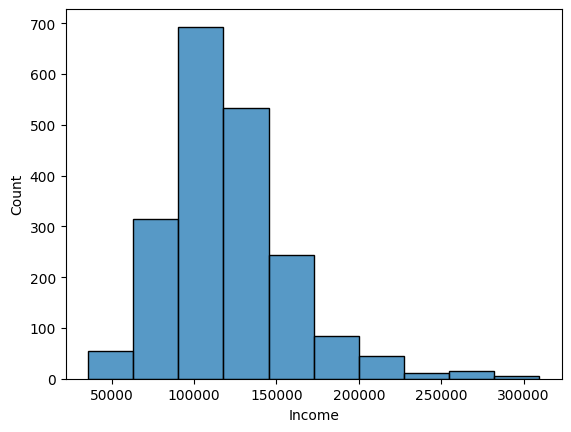

In [9]:
sns.histplot(dados.Income, bins = 10)

<Axes: xlabel='Age', ylabel='Count'>

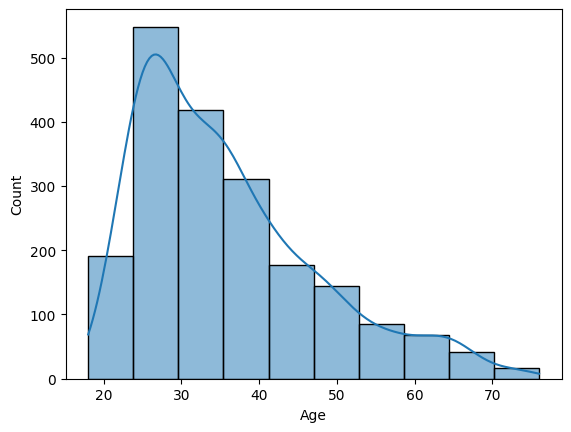

In [11]:
sns.histplot(dados.Age, bins = 10, kde = True)

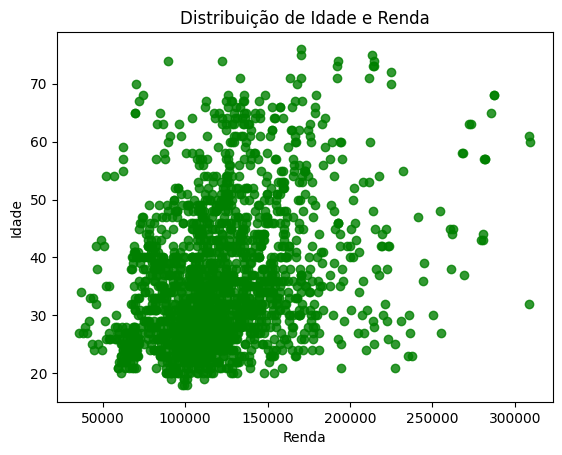

In [16]:
plt.scatter(dados.Income, dados.Age, c = 'green', alpha = 0.8)
plt.title("Distribuição de Idade e Renda")
plt.xlabel("Renda")
plt.ylabel("Idade")
plt.show()

In [42]:
df = dados.iloc[:,[2,4]]
df

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031
...,...,...
1995,47,123525
1996,27,117744
1997,31,86400
1998,24,97968


In [43]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

In [111]:
df.shape

(2000, 2)

### Seleção de Clusters

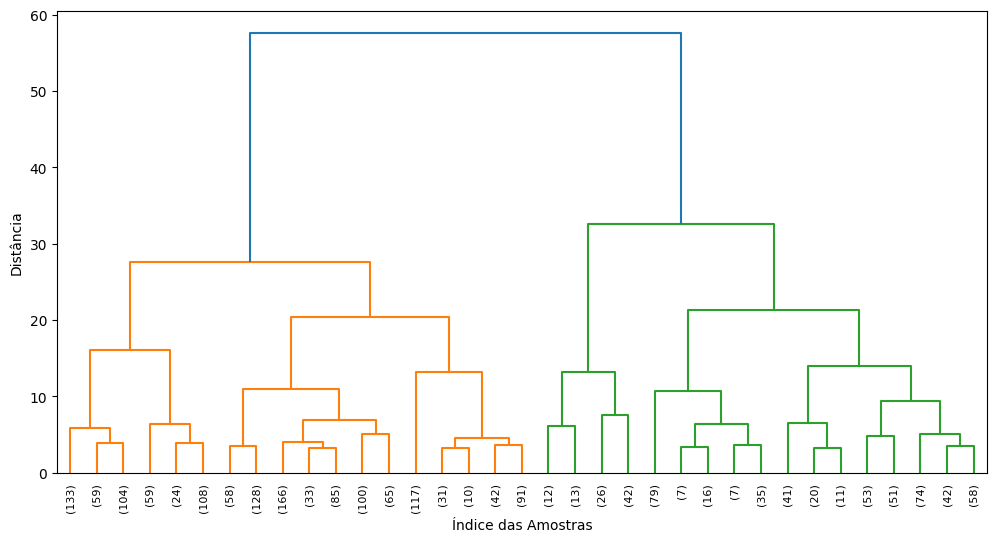

In [44]:
z = linkage(df, method = 'ward')
fig, ax = plt.subplots(figsize=(12,6))
dendrogram(z, p = 35, truncate_mode = 'lastp', leaf_font_size = 8, leaf_rotation = 90)
plt.ylabel("Distância")
plt.xlabel("Índice das Amostras")
plt.show()

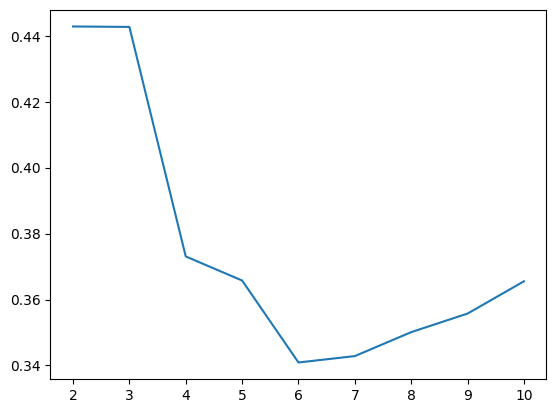

In [74]:
plt.plot(range(2,11), clust['Silhouette_score'][0:9])

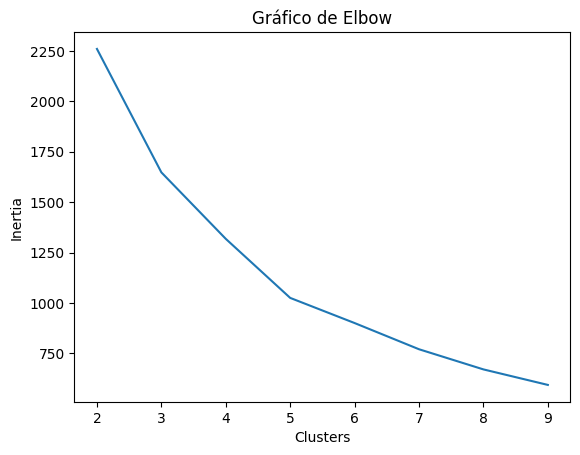

In [69]:
inertia = []
for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, n_init = 'auto')
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,10), inertia)
plt.title("Gráfico de Elbow")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

### KMeans com Idade e Renda

In [84]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 500)
y_pred = kmeans.fit_predict(df)

In [58]:
def compare_algo(X, max_clusters):
    silhouette = []
    n_clusters = range(2, max_clusters + 1)

    for cluster in n_clusters:
        kmeans = KMeans(n_clusters = cluster, n_init = 'auto', random_state = 0)
        kmeans.fit(X)
        clusters = kmeans.predict(X)
        score = silhouette_score(X, clusters)
        silhouette.append(("KMeans", cluster, score))

    for cluster in n_clusters:
        agglo = AgglomerativeClustering(n_clusters = cluster)
        clusters = agglo.fit_predict(X)
        score = silhouette_score(X, clusters)
        silhouette.append(("Agglomerative", cluster, score))

    return silhouette

In [59]:
clust = compare_algo(df, 10)
clust = pd.DataFrame(clust, columns = ["Agrupador", "Clusters", "Silhouette_score"])
clust

,Agrupador,Clusters,Silhouette_score
0,KMeans,2,0.442817
1,KMeans,3,0.442682
2,KMeans,4,0.373064
3,KMeans,5,0.365763
4,KMeans,6,0.340902
5,KMeans,7,0.342839
6,KMeans,8,0.350107
7,KMeans,9,0.355736
8,KMeans,10,0.365521
9,Agglomerative,2,0.445536


In [60]:
idx = clust['Silhouette_score'].idxmax()
print(clust.loc[idx])

Agrupador           Agglomerative
Clusters                        3
Silhouette_score         0.447314
Name: 10, dtype: object


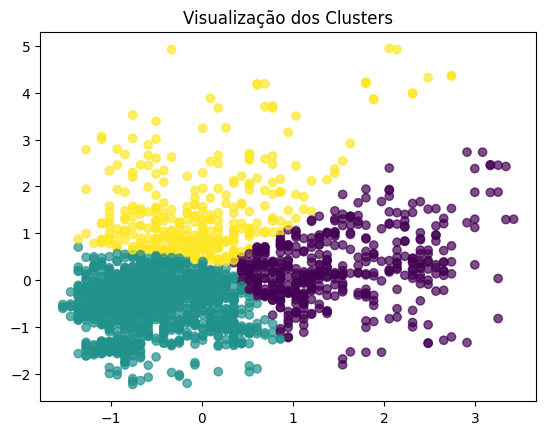

In [86]:
plt.scatter(df[:,0],df[:,1], c = y_pred, alpha = 0.7, cmap = 'viridis')
plt.title("Visualização dos Clusters")
plt.show()

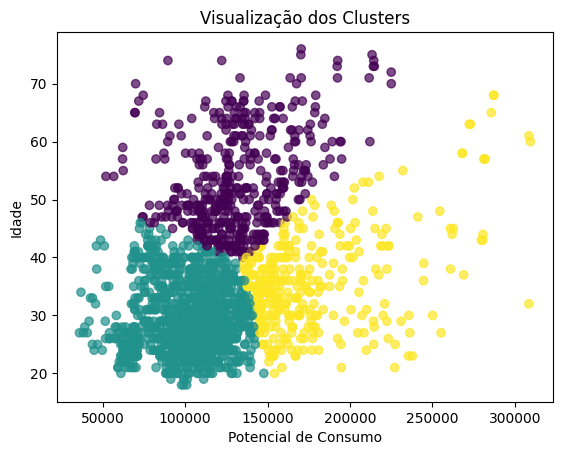

In [110]:
plt.scatter(dados.iloc[:,4],dados.iloc[:,2], c = kmeans.labels_, alpha = 0.7, cmap = 'viridis')
plt.title("Visualização dos Clusters")
plt.xlabel("Potencial de Consumo")
plt.ylabel("Idade")
plt.show()

### Aglomerativo com PCA

In [112]:
dados.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [191]:
df2 = dados
scaler1 = StandardScaler()
df2 = scaler1.fit_transform(df2)
df2

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [195]:
pca = PCA(n_components = 3)
df2 = pca.fit_transform(df2)
df2

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

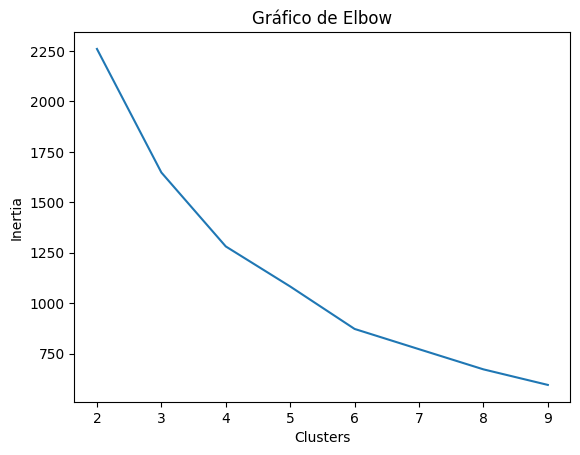

In [139]:
inertia = []
for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, n_init = 'auto')
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,10), inertia)
plt.title("Gráfico de Elbow")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

In [196]:
agglo = AgglomerativeClustering(n_clusters = 3, compute_distances = True)
y_agglo = agglo.fit_predict(df2)
y_agglo

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

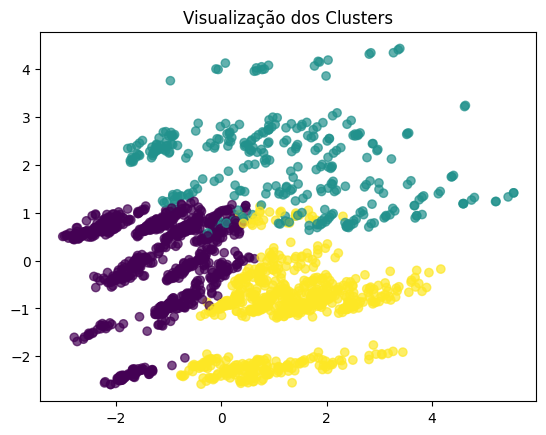

In [197]:
plt.scatter(df2[:,0],df2[:,1], c = agglo.labels_, alpha = 0.7, cmap = 'viridis')
plt.title("Visualização dos Clusters")
plt.show()

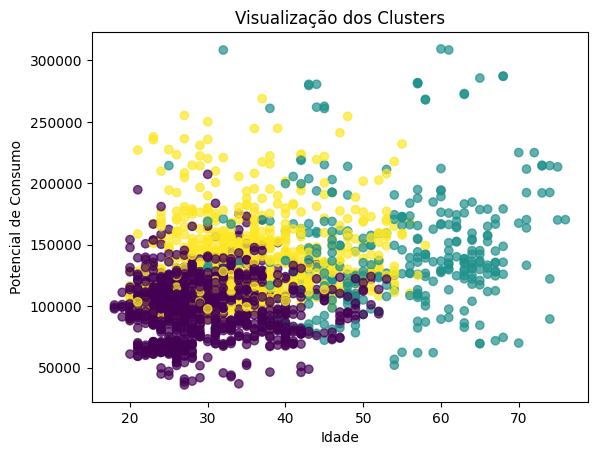

In [198]:
plt.scatter(dados.iloc[:,2],dados.iloc[:,4], c = y_agglo, alpha = 0.7, cmap = 'viridis')
plt.title("Visualização dos Clusters")
plt.ylabel("Potencial de Consumo")
plt.xlabel("Idade")
plt.show()